In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from scipy.stats import zscore
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=['MEDV'])

基本的なデータ探索について記述せよ  
以下の観点をすべて含めて記述しましょう。  
このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)  
それぞれのカラムは何を表しているのか   
【回答】  
Harrison, D. and Rubinfeld, D.L. ‘Hedonic prices and the demand for clean air’, J. Environ. Economics & Management,  
vol.5, 81-102, 1978.によるもので、Boston Standard Metropolitan Statistical Area (Boston SMSA）  
の大気汚染と住宅価格の関係を調査したもの。  
CRIM・・・犯罪発生率（人口単位）  
ZN・・・25,000平方フィート以上の住宅区画の割合  
INDUS・・・非小売業の土地面積の割合（人口単位）  
CHAS・・・チャールズ川沿いかどうか（1:Yes、0:No）  
NOX・・・窒素酸化物の濃度（pphm単位）  
RM・・・1戸あたりの平均部屋数  
AGE・・・1940年よりも前に建てられた家屋の割合  
DIS・・・ボストンの主な5つの雇用圏までの重み付きの郷里  
RAD・・・幹線道路へのアクセス指数  
TAX・・・10,000ドルあたりの所得税率  
PTRATIO・・・教師あたりの生徒の数（人口単位）  
B・・・アフリカ系アメリカ人居住者の割合（人口単位）  
LSTAT・・・低所得者の割合  

In [4]:
T = pd.concat([X, y], axis=1)
T.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


describeメソッドを用いることで把握できたこと(考察)を記述せよ  
この設問は少し難しいと思われるので、まずは記述してみること、考えてみることが大切です。  
以下の観点をすべて含めて記述しましょう。  
前処理に関して気をつけるべき点  
機械学習の手法選択に活かせること  
機械学習の特徴選択について考えられること  
【回答】   
データ数は506とそれほど大きくないのでそれにあった手法を選択しなけらばいけない。  
ある程度データは分散をもっていなければならない。  
特徴量が多いと汎化性能を向上させることが難しくなる。  
データは数値化できているのでそのまま予測に使えそう。  
正規化はしていないデータ。  

In [5]:
T.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


二変数の可視化について記述せよ　相関  
この設問は少し難しいと思われるので、まずは記述してみること、考えてみることが大切です。  
以下の観点をすべて含めて記述しましょう。  
そもそも相関とは何か  
MEDVにもっとも相関があると出力された変数を3つほどあげよ  
相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）   
【回答】  
相関というのは、2つ以上のもとがあるときに、それらが「どれぐらい類似しているか」という「類似度」を意味する。  
MEDVにもっとも相関があると出力された変数：LSTAT、RM、PTRATIO  
目的変数（MEDV)に類似しているデータであるため説明変数として利用できる。

相関の注意点について記述せよ  
便利な相関であるが、落とし穴がある  
相関が正しく2変数の関係を表していない時がある、それはどのような場合かその場合、どのような手段によって、確認するべきか  
【回答】  
２変数に共通に影響する第３の変数がありその影響で見かけ上相関があるように見える。  
２変数から第３の変数の影響を取り除くことで確認することができる。（統計的消去）  


[]

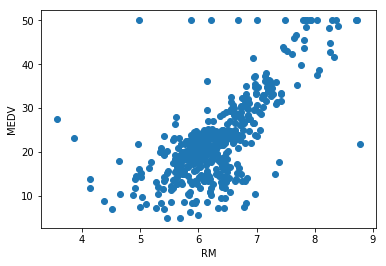

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

x_rm=X['RM'].values
plt.scatter(x_rm, y)

plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot()

[]

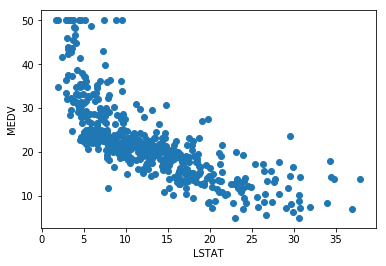

In [7]:
x_rm=X['LSTAT'].values
plt.scatter(x_rm, y)

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.plot()

[]

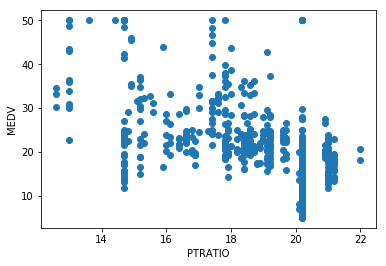

In [8]:
x_rm=X['PTRATIO'].values
plt.scatter(x_rm, y)

plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.plot()

二変数の可視化について記述せよ　プロット  
それぞれのプロット結果から、今回の相関はそれぞれ信用できるか記述せよ。  
【回答】  
RMは正の相関、LSTATは負の相関があるように見える。  
PTRATIOは相関がないように見える。

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_train,y_train)
tree.score(X_test, y_test)

0.81715036111411954

In [21]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train,y_train)
tree.score(X_test, y_test)

0.74360667083305332

In [22]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)
tree.score(X_test, y_test)

0.81715036111411954

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


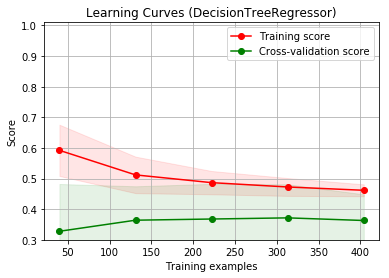

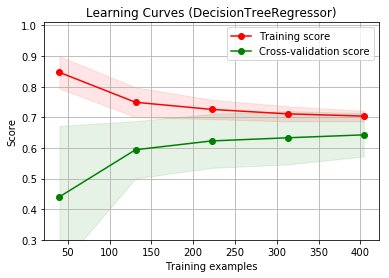

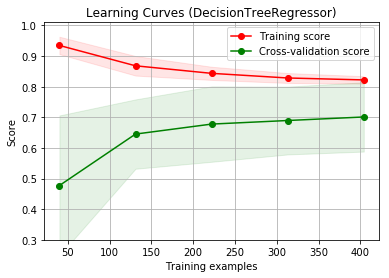

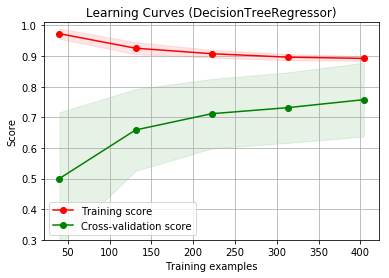

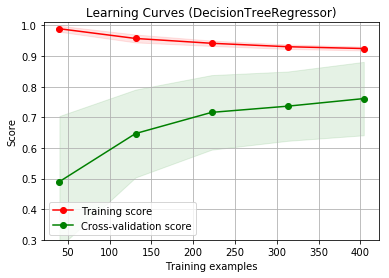

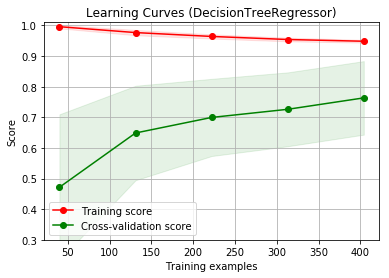

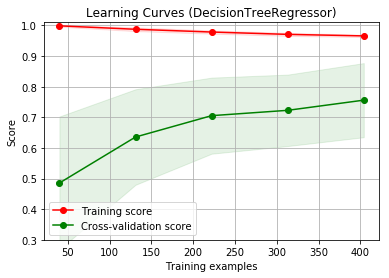

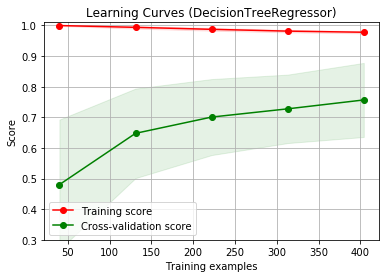

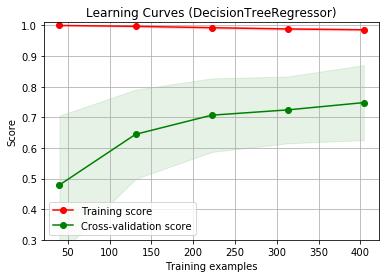

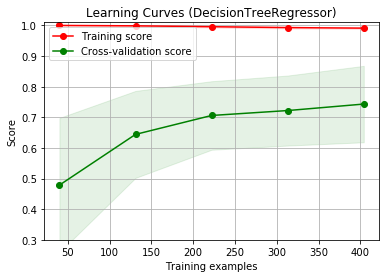

In [26]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title, X , y, ylim=(0.3, 1.01), cv=cv, n_jobs=4)


学習曲線について記述せよ  
High varianceとは何か  
High Biasとは何か  
もっとも結果が良いと思われた深さをひとつ選択せよ  
なぜその深さが最も良いか記述せよ  
その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ  
【回答】  
High variance：訓練データに依存し過ぎることで新しいデータへの予測が悪化する（過学習）  
High Bias:モデルが単純であまり学習が上手くいっていない（学習不足）  
もっとも結果が良いと思われた深さをひとつ選択せよ:max_depth=2
両曲線のScoreはある程度高く、近づいているのでバランスが良い。
その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか：
多少よくなる可能性はあるが、必ずしもよくなるとは限らない。

In [15]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 4}


グリッドサーチについて記述せよ  
グリッドサーチとは何か  
グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ  
その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか  
【回答】
グリッドサーチとは、ハイパーパラメータの探索空間を格子状 (グリッド) に区切り、  
交点となるハイパーパラメータの組み合わせについて、すべて調べるという方法です。  
ランダムサーチ  
ランダムサーチでは解のすべての可能性の空間を考え、
その中から無作為に選び出した解が条件に適合するか判定するというもの。
グリットサーチは全ての組み合わせを調べるため時間がかかるが、
ランダムサーチはランダムに選択するため処理時間が短い。
ハイパーパラメータが多すぎて時間がかかりそうな場合はランダムサーチを使う。

グリッドサーチを使いこなそう  
グリッドサーチの際、Kfoldの折りたたみの回数を5回と設定しているが、それぞれ3回と10回に変えて検証せよ、  
また結果を元にどの折りたたみ回数がベストなのか考察せよ  
グリッドサーチにおいて評価方法を決定係数を使用していたが、平均二乗誤差に変更せよ  
【回答】  
cv=5の時はscoreが低い。また、cv=3,10の時はscoreは0.8と比較的高い。
max_depthをあまり深くしない方が良いのでcv=10が一番良い。

In [57]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 9}
0.811034552081


In [58]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 1}
45.172131403


In [59]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5}
0.816050036442


In [60]:
grid.score(X_test,y_test)

0.71057410196045012